In [2]:
%matplotlib inline
import numpy as np
import torch

import sys 
sys.path.insert(0,'..')
from utils.dataset import HandwritingDataset
from utils import plot_stroke
from utils.data_utils import data_denormalization
from utils.constants import Global

In [3]:
data_path = '../data/'
traindata = HandwritingDataset(data_path, split='train', text_req=False, debug=False)
validdata = HandwritingDataset(data_path, split='valid', text_req=False, debug=False)

In [4]:
print('Size of train dataset: {}'.format(len(traindata)))
print('Size of valid dataset: {}'.format(len(validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [5]:
print('Shape of train dataset: {}'.format(traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [8]:
idx = 10
input_seq, target, mask = traindata[idx]
print(input_seq.shape)
print(input_seq.device)

torch.Size([300, 3])
cpu


Normalized data


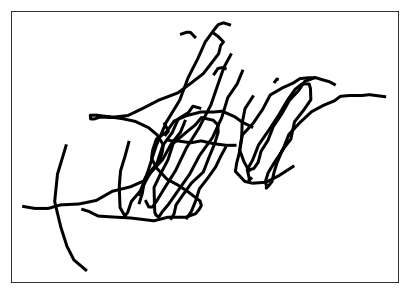

In [9]:
print('Normalized data')
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 300, 3)
Train mean: [ 0.22326155 -0.00329747] 
 Train std: [1.5289787 1.3605367]
Denormalized data


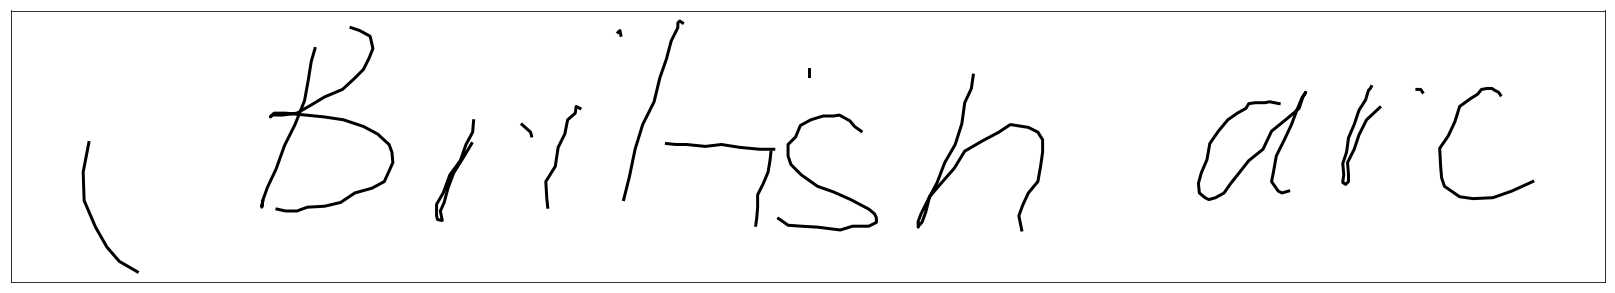

In [10]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [11]:
_traindata = HandwritingDataset(data_path, split='train', text_req=True, debug=False)
_validdata = HandwritingDataset(data_path, split='valid', text_req=True, debug=False)

In [12]:
print('Size of train dataset: {}'.format(len(_traindata)))
print('Size of valid dataset: {}'.format(len(_validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [14]:
print('Shape of train dataset: {}'.format(_traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [18]:
idx = 20
input_seq, target, mask, text, char_mask = _traindata[idx]
print(input_seq.shape)
text_seq = _traindata.idx_to_char(text.long().numpy())
text_str = ''.join(text_seq)

print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))

torch.Size([1191, 3])
Train mean: [ 0.22330713 -0.00328921] 
 Train std: [1.5280963 1.360169 ]


Normalized data
Text:  marking the top member                                          


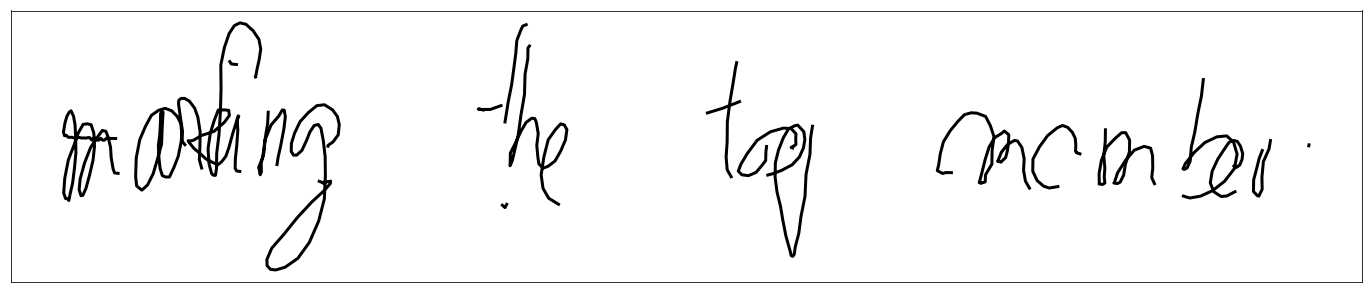

In [19]:
print('Normalized data')
print("Text: ", text_str)
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 1191, 3)
Train mean: [ 0.22330713 -0.00328921] 
 Train std: [1.5280963 1.360169 ]
Denormalized data


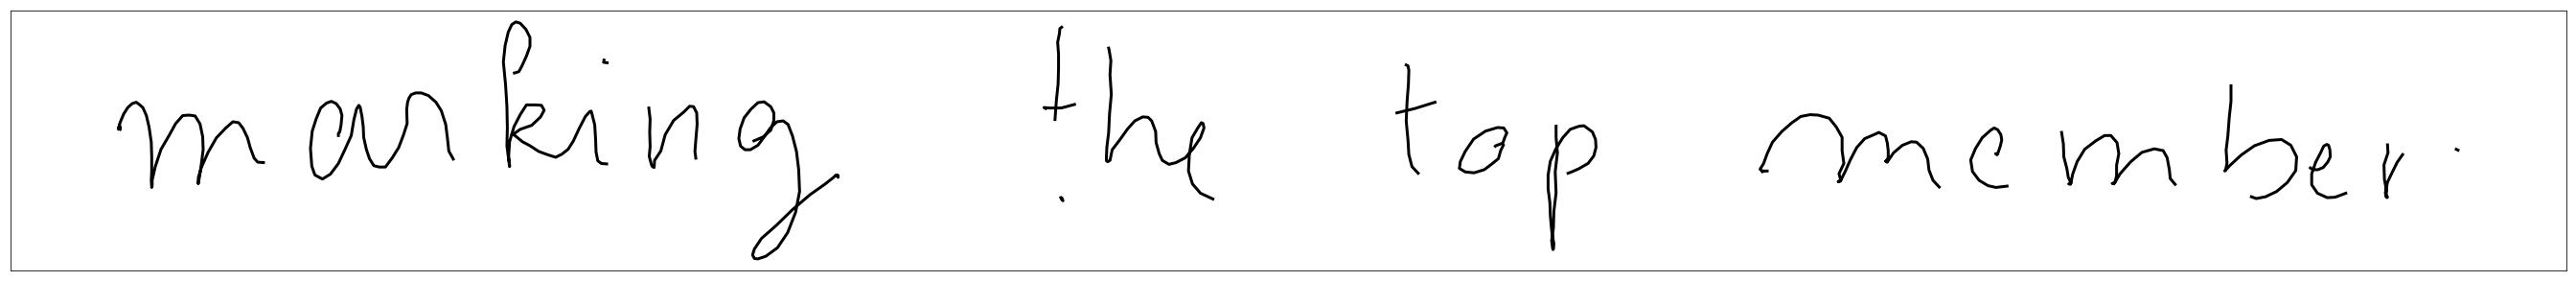

In [20]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [21]:
mean = denor_stroke_seq[:, :, 1:].mean(axis=(0, 1))
denor_stroke_seq[:, :, 1:] -= mean
std = denor_stroke_seq[:, :, 1:].std(axis=(0, 1))
denor_stroke_seq[:, :, 1:] /= std
print(denor_stroke_seq[:, :, 1:].mean(axis=(0, 1)), denor_stroke_seq[:, :, 1:].std(axis=(0, 1)))
# print('Normalized stroke for mean 0 and std 1 \n{}'.format(denor_stroke_seq))

[5.2047717e-09 1.0436521e-08] [0.9999932  0.99999976]


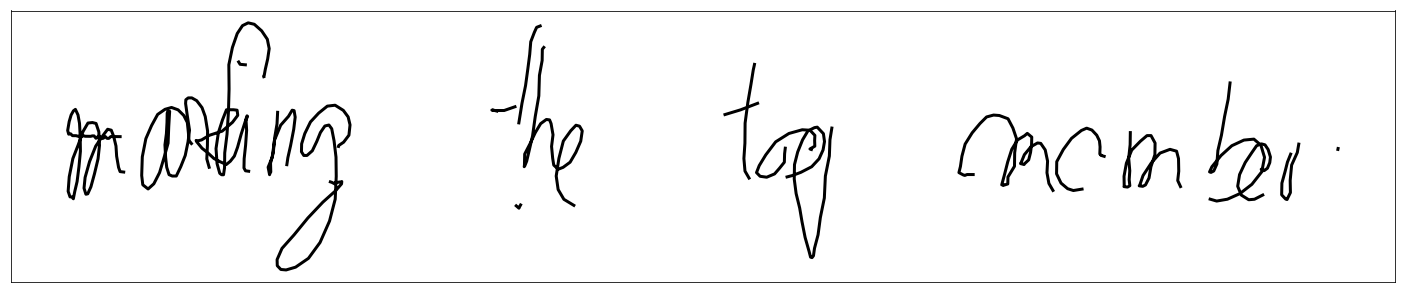

In [22]:
plot_stroke(denor_stroke_seq[0])

In [28]:
strokes = np.load(data_path + 'strokes.npy', allow_pickle=True, encoding='bytes')
with open(data_path + 'sentences.txt') as file:
    texts = file.read().splitlines()
np.savetxt("data_1.txt", strokes[0], delimiter=',', newline='\n', encoding='utf-8')

6000
[3871 3424 4030 2578  439 5114 2828 4986 1118  236]


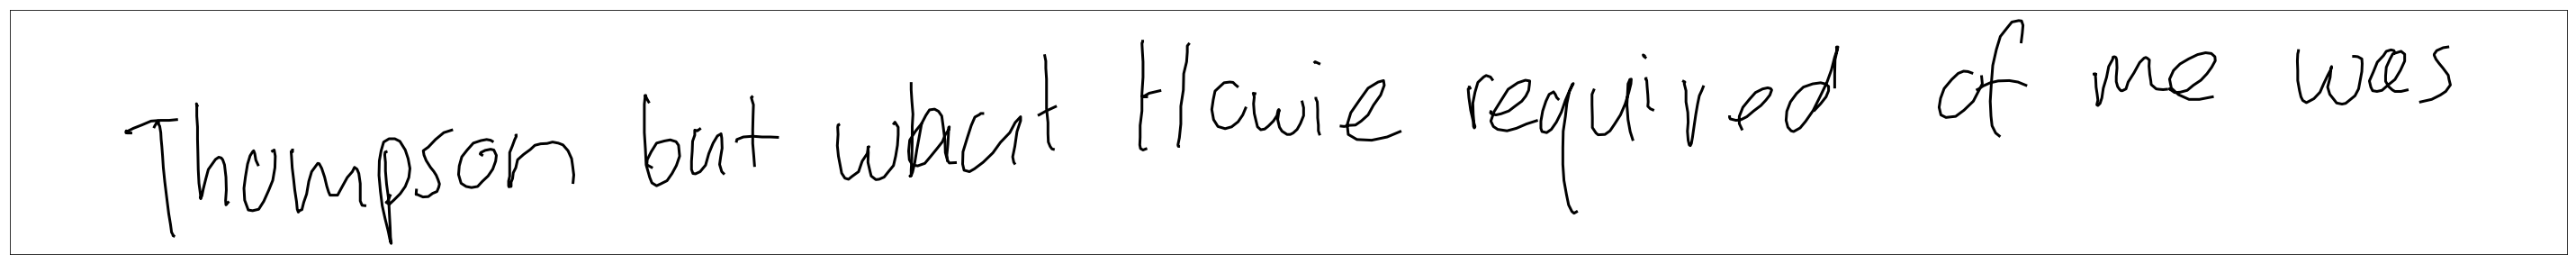

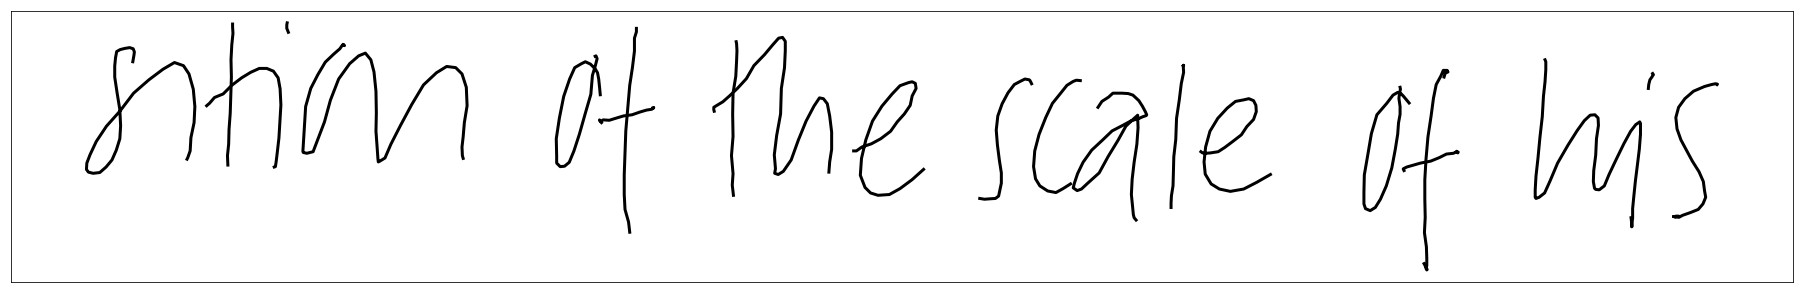

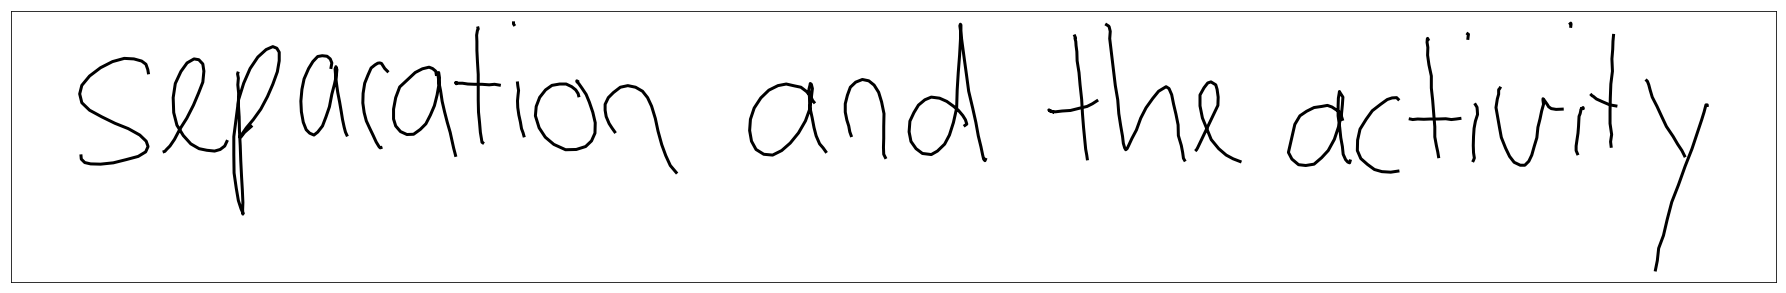

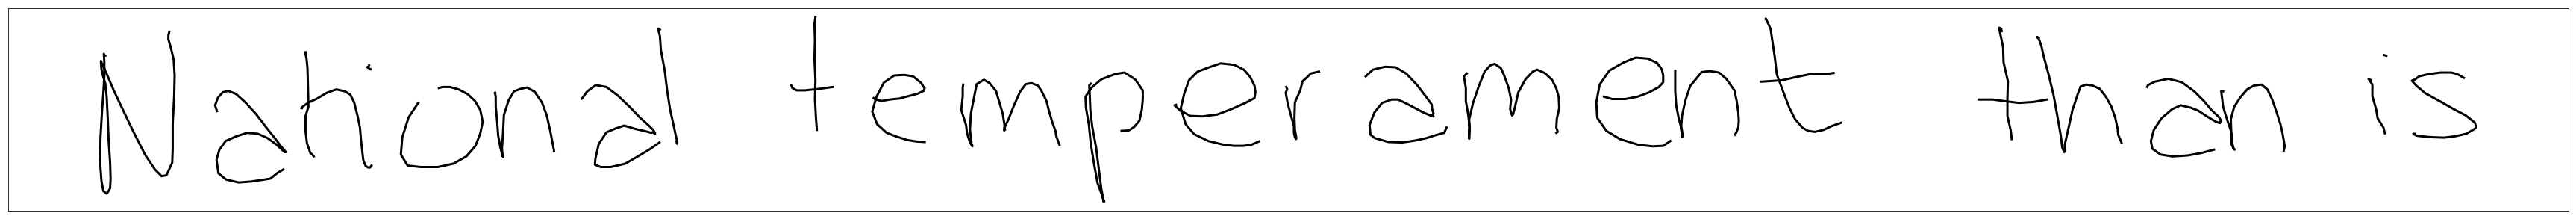

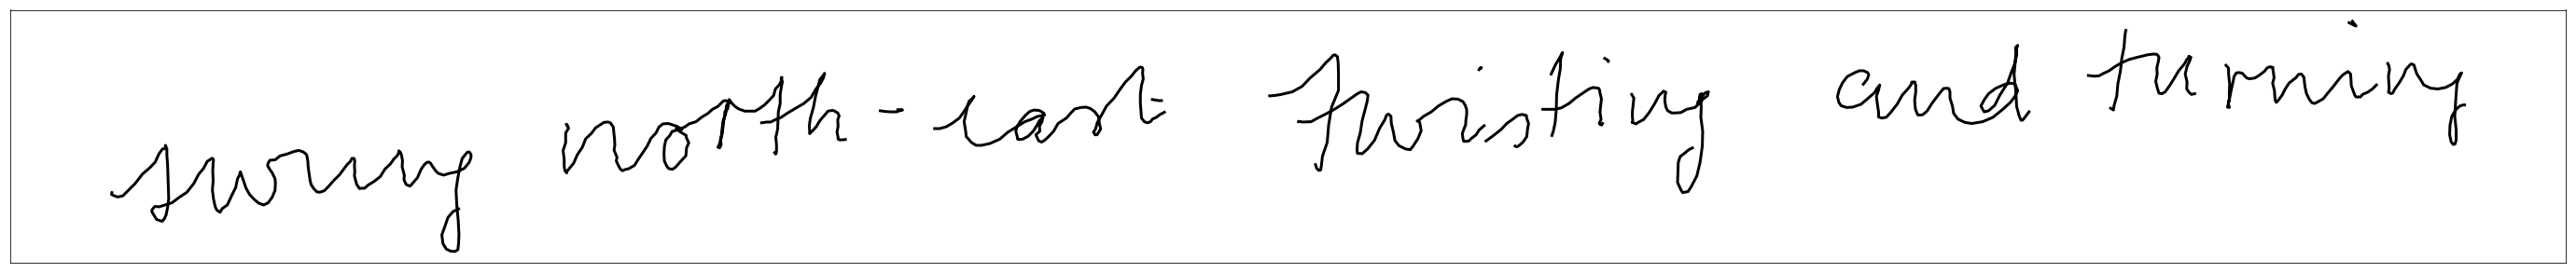

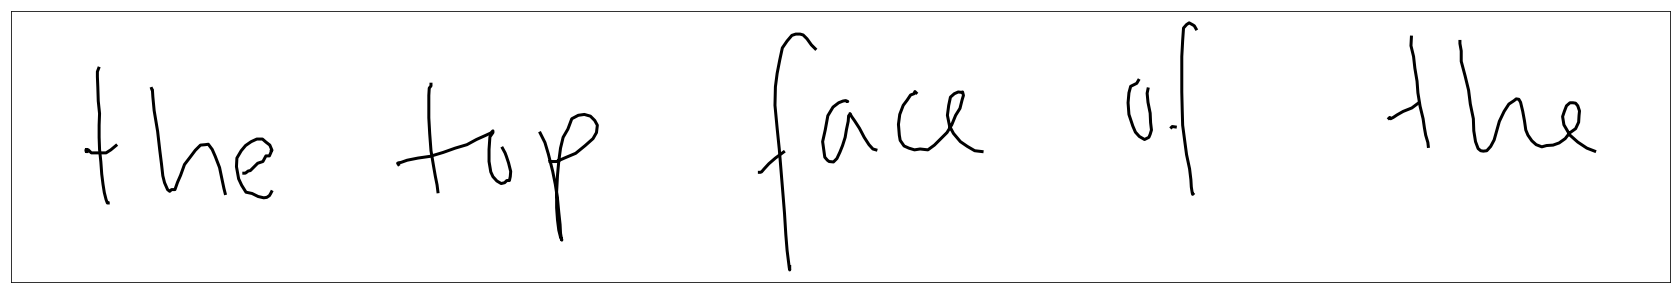

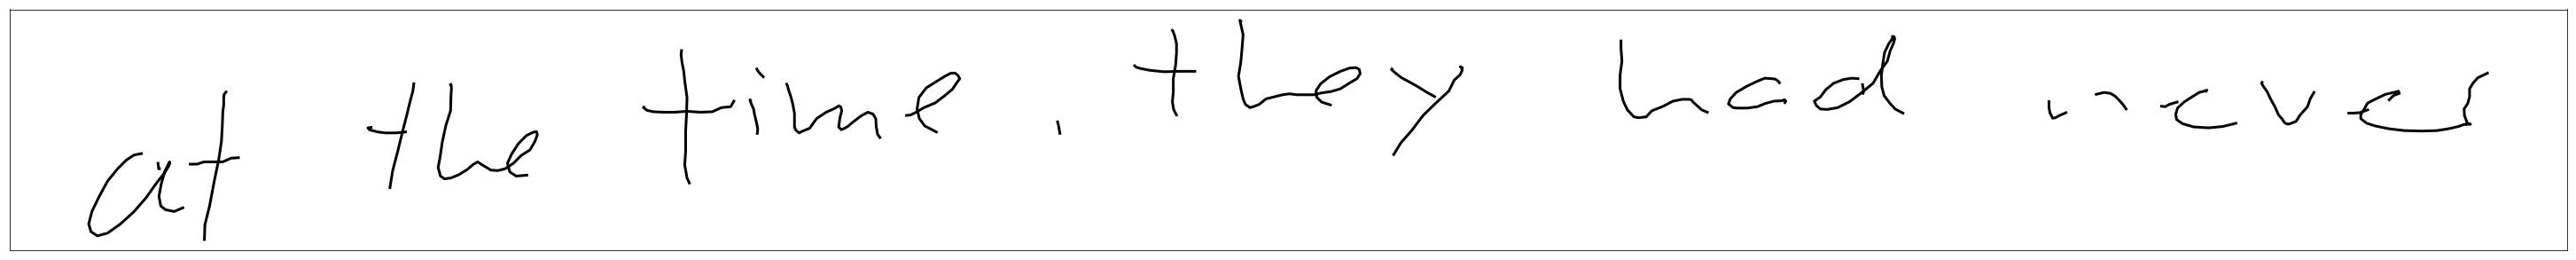

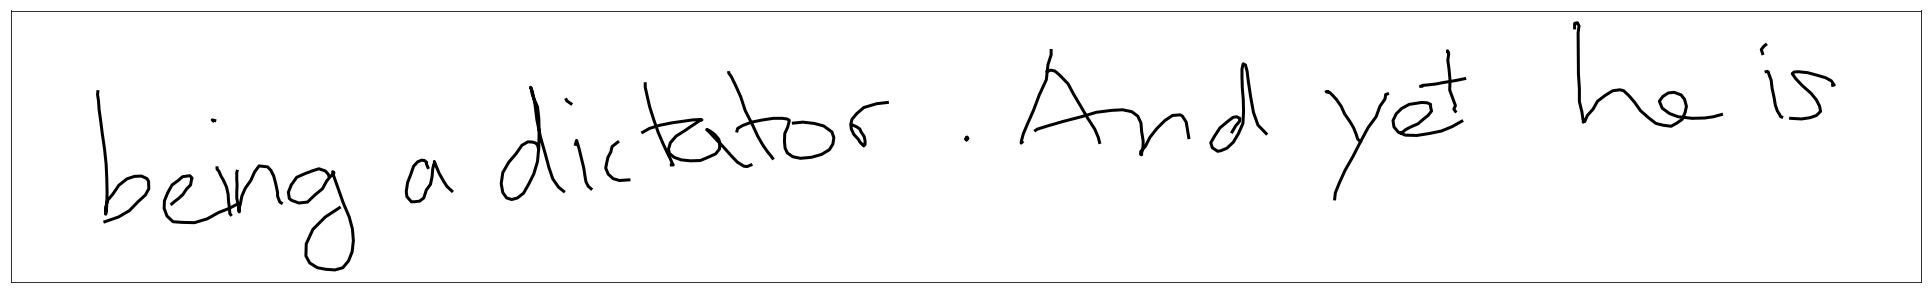

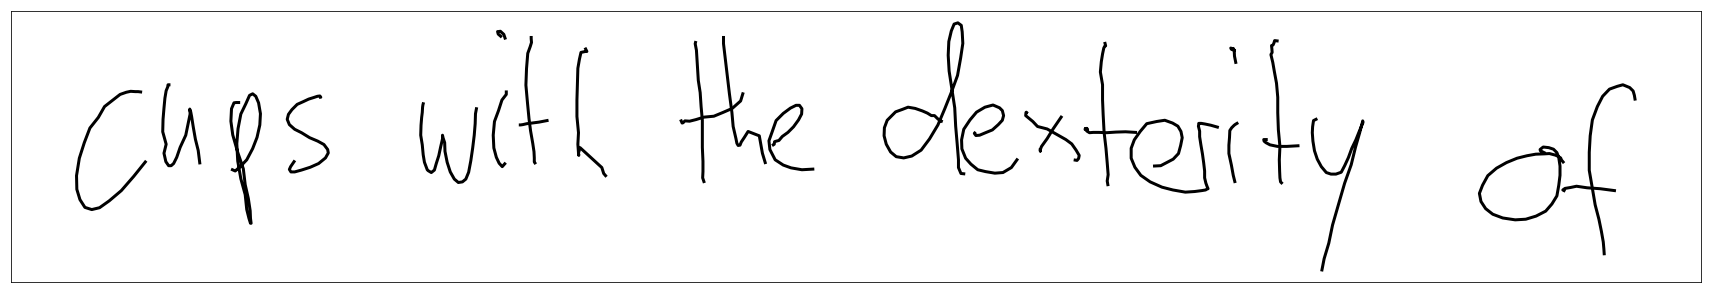

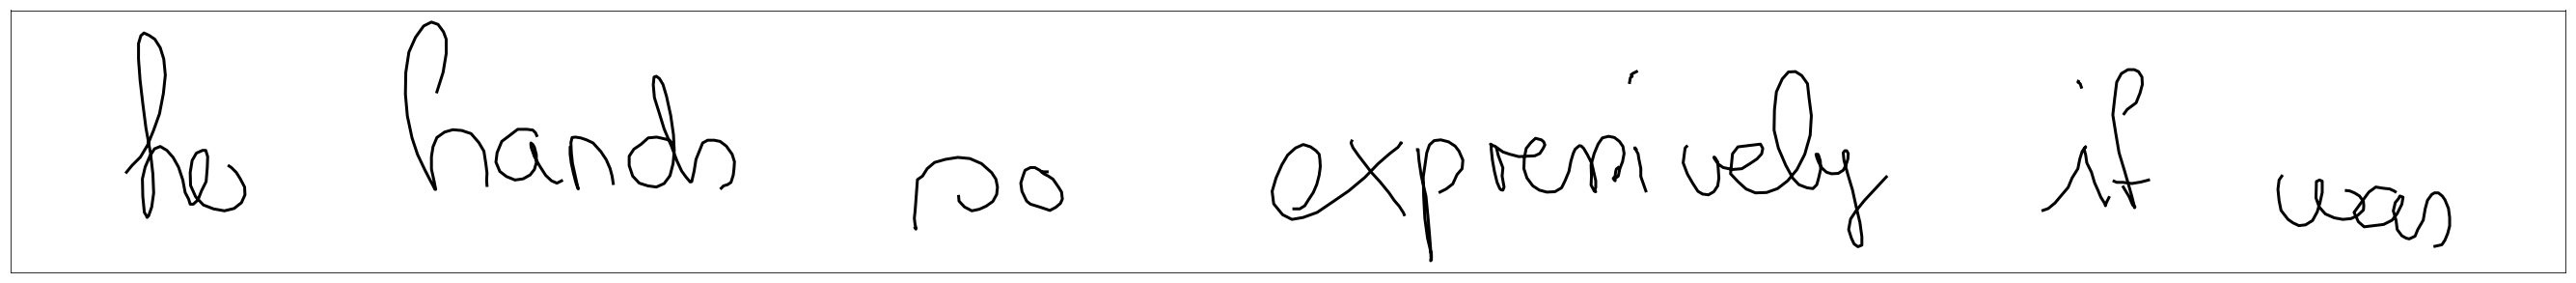

In [37]:
print(len(strokes))
index = np.random.randint(0, len(strokes), 10)
print(index)
for i in index:
    plot_stroke(strokes[i])

In [31]:
index[6]

276

In [38]:
index[2]

4030